# Afternoon: Introduction to Spatial Analysis

In [1]:
#-- Import Required Python Packages
import numpy as np
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.spatial
import scipy.linalg

#-- Import R packages in Python
r = robjects.r
nlme = importr('nlme')
stats = importr('stats')

### CAN'T IMPORT THE FOLLOWING.. fix later
#fields = importr('fields')
#geoR = importr('geoR')
#colorRamps = importr('colorRamps')

# What generates the pattern?

# Simulate spatially correlated data

In [41]:
M = np.array(np.meshgrid(range(1,31), range(1,31))).reshape(2, 30**2).T
n = len(M)
D_upper_triangle = scipy.spatial.distance.pdist(M) #-- Upper triangle distance matrix
D = scipy.spatial.distance.squareform(D_upper_triangle) #-- convert to square form 
r = 0.1
s = 10
S = s**2*np.exp(-r*D)
L = scipy.linalg.cho_factor(S,lower=True)
Si = scipy.linalg.cho_solve(L,np.eye(S.shape[0]))
Li = np.linalg.inv(L[0])

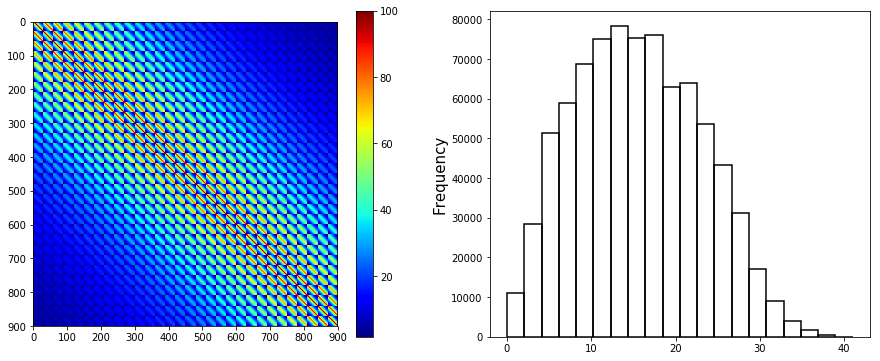

In [42]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
corr_fig = ax[0].imshow(S,cmap='jet') #, origin='lower'
cbar = fig.colorbar(corr_fig,ax=ax[0])
ax[1].hist(D.flatten(),20,edgecolor='k',facecolor='none',linewidth=1.5)
ax[1].set_ylabel('Frequency',fontsize=15)
plt.show()